In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-politics-2004-2019/IndiaVotes_PC__All_States_2009.csv
/kaggle/input/indian-politics-2004-2019/IndiaVotes_PC__All_States_2014.csv
/kaggle/input/indian-politics-2004-2019/2024.csv
/kaggle/input/indian-politics-2004-2019/2019.csv
/kaggle/input/indian-politics-2004-2019/cleaned.csv
/kaggle/input/indian-politics-2004-2019/2004.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/indian-politics-2004-2019/cleaned.csv')

In [4]:
df.rename(columns={'Unnamed: 0': 'PC'}, inplace=True)

# 2024

In [5]:
original_classes_2024 = sorted(df['Party_2024'].unique())

label_mapping_2024 = {original_classes_2024[i]: i for i in range(len(original_classes_2024))}

df['Party_2024_mapped'] = df['Party_2024'].map(label_mapping_2024)

print("Original classes for 2024:", original_classes_2024)
print("Label mapping for 2024:", label_mapping_2024)
print("New class labels for 2024:", df['Party_2024_mapped'].unique())

Original classes for 2024: [1, 2, 4, 6, 7, 8, 11, 13, 17, 18, 21, 22, 25, 29, 32, 34, 42, 47, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
Label mapping for 2024: {1: 0, 2: 1, 4: 2, 6: 3, 7: 4, 8: 5, 11: 6, 13: 7, 17: 8, 18: 9, 21: 10, 22: 11, 25: 12, 29: 13, 32: 14, 34: 15, 42: 16, 47: 17, 51: 18, 53: 19, 54: 20, 56: 21, 57: 22, 58: 23, 59: 24, 60: 25, 61: 26, 62: 27, 63: 28, 64: 29, 65: 30, 66: 31, 67: 32, 68: 33, 69: 34}
New class labels for 2024: [ 1  2  0 23 14 24  7  5 25 26 27  3  6 15 18 10  4 28 29 30 31 16 19 32
  9 12 20 33  8 21 17 34 22 11 13]


In [6]:
features_2024 = [
    'State_2004', 'Electors_2004', 'Votes_2004', 'Turnout_2004', 'Margin_2004', 'Margin %_2004',
    'State_2009', 'Electors_2009', 'Votes_2009', 'Turnout_2009', 'Margin_2009', 'Margin %_2009',
    'State_2014', 'Electors_2014', 'Votes_2014', 'Turnout_2014', 'Margin_2014', 'Margin %_2014',
    'State_2019', 'Electors_2019', 'Votes_2019', 'Turnout_2019', 'Margin_2019', 'Margin %_2019'
]

target_2024 = 'Party_2024_mapped'

In [7]:
X = df[features_2024]
y = df[target_2024]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
nb_model = MultinomialNB()

In [10]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [11]:
y_pred = nb_model.predict(X_test)

party_seat_counts_2024 = pd.Series(y_pred).value_counts().sort_index()

print("\nTotal predicted number of seats by each party in 2024:")
for party, seats in party_seat_counts_2024.items():
    print(f"Party {party}: {seats} seats")

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report for 2024:\n", classification_report(y_test, y_pred))


Total predicted number of seats by each party in 2024:
Party 0: 7 seats
Party 1: 6 seats
Party 2: 3 seats
Party 3: 2 seats
Party 4: 3 seats
Party 5: 1 seats
Party 7: 1 seats
Party 8: 1 seats
Party 9: 5 seats
Party 10: 5 seats
Party 11: 1 seats
Party 12: 1 seats
Party 15: 2 seats
Party 16: 3 seats
Party 18: 5 seats
Party 19: 1 seats
Party 20: 11 seats
Party 21: 1 seats
Party 22: 2 seats
Party 23: 3 seats
Party 26: 1 seats
Party 27: 1 seats
Party 28: 1 seats
Party 29: 4 seats
Party 30: 1 seats
Party 31: 4 seats
Party 34: 1 seats
Model Accuracy: 0.09090909090909091

Classification Report for 2024:
               precision    recall  f1-score   support

           0       0.14      0.33      0.20         3
           1       0.83      0.12      0.21        42
           2       0.33      0.07      0.11        15
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6     

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

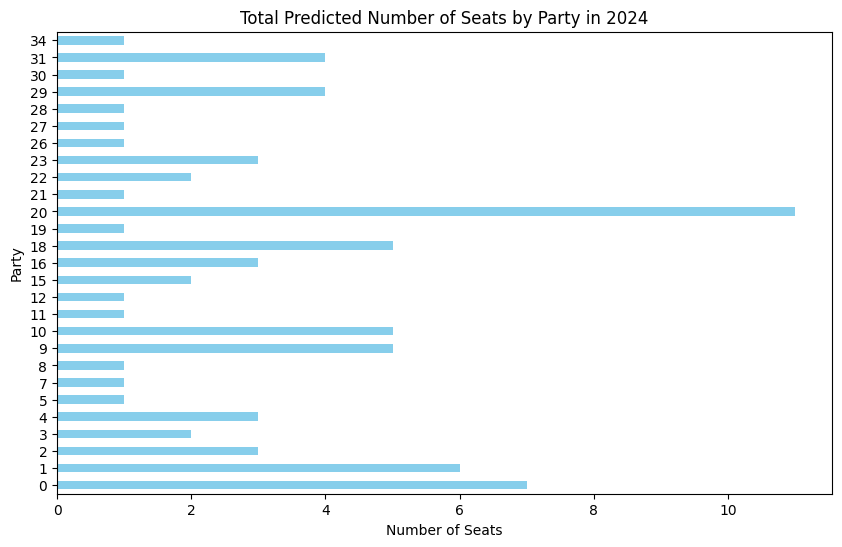

In [12]:
plt.figure(figsize=(10, 6))
party_seat_counts_2024.plot(kind='barh', color='skyblue')

plt.xlabel('Number of Seats')
plt.ylabel('Party')
plt.title('Total Predicted Number of Seats by Party in 2024')

plt.show()

# 2019

In [13]:
original_classes_2019 = sorted(df['Party_2019'].unique())

label_mapping_2019 = {original_classes_2019[i]: i for i in range(len(original_classes_2019))}

df['Party_2019_mapped'] = df['Party_2019'].map(label_mapping_2019)

print("Original classes for 2019:", original_classes_2019)
print("Label mapping for 2019:", label_mapping_2019)
print("New class labels for 2019:", df['Party_2019_mapped'].unique())

Original classes for 2019: [0, 1, 2, 3, 4, 6, 7, 8, 12, 15, 17, 18, 19, 21, 22, 23, 26, 32, 34, 39, 41, 42, 46, 47, 49, 51, 52, 53, 54, 55, 56, 57]
Label mapping for 2019: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 6: 5, 7: 6, 8: 7, 12: 8, 15: 9, 17: 10, 18: 11, 19: 12, 21: 13, 22: 14, 23: 15, 26: 16, 32: 17, 34: 18, 39: 19, 41: 20, 42: 21, 46: 22, 47: 23, 49: 24, 51: 25, 52: 26, 53: 27, 54: 28, 55: 29, 56: 30, 57: 31}
New class labels for 2019: [ 2  6  4  3 12 17  8  1  7  9  5 18 25 20 26 15 11 27  0 19 28 16 29 10
 30 22 23 13 21 31 24 14]


In [14]:
features_2019 = [
    'State_2004', 'Electors_2004', 'Votes_2004', 'Turnout_2004', 'Margin_2004', 'Margin %_2004',
    'State_2009', 'Electors_2009', 'Votes_2009', 'Turnout_2009', 'Margin_2009', 'Margin %_2009',
    'State_2014', 'Electors_2014', 'Votes_2014', 'Turnout_2014', 'Margin_2014', 'Margin %_2014',
]

target_2019 = 'Party_2019_mapped'

In [15]:
X = df[features_2019]
y = df[target_2019]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
nb_model_2019 = MultinomialNB()
nb_model_2019.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_pred_2019 = nb_model_2019.predict(X_test)

party_seat_counts_2019 = pd.Series(y_pred_2019).value_counts().sort_index()

print("\nTotal predicted number of seats by each party in 2019:")
for party, seats in party_seat_counts_2019.items():
    print(f"Party {party}: {seats} seats")

print("Model Accuracy:", accuracy_score(y_test, y_pred_2019))
print("\nClassification Report for 2019:\n", classification_report(y_test, y_pred_2019))



Total predicted number of seats by each party in 2019:
Party 0: 3 seats
Party 1: 3 seats
Party 2: 10 seats
Party 3: 3 seats
Party 4: 1 seats
Party 5: 7 seats
Party 6: 2 seats
Party 7: 1 seats
Party 8: 3 seats
Party 9: 2 seats
Party 10: 2 seats
Party 11: 2 seats
Party 12: 1 seats
Party 14: 7 seats
Party 15: 1 seats
Party 17: 2 seats
Party 19: 1 seats
Party 20: 2 seats
Party 21: 2 seats
Party 24: 1 seats
Party 25: 2 seats
Party 26: 3 seats
Party 27: 2 seats
Party 28: 11 seats
Party 30: 1 seats
Party 31: 2 seats
Model Accuracy: 0.16883116883116883

Classification Report for 2019:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.80      0.15      0.26        52
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

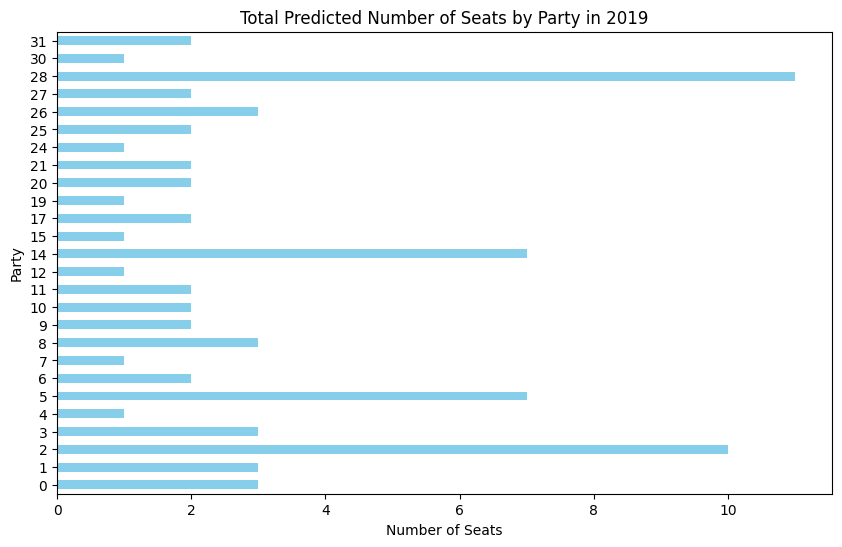

In [19]:
plt.figure(figsize=(10, 6))
party_seat_counts_2019.plot(kind='barh', color='skyblue')

plt.xlabel('Number of Seats')
plt.ylabel('Party')
plt.title('Total Predicted Number of Seats by Party in 2019')

plt.show()